In [1]:
import os.path as osp

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from algo_utils.config import system_config

In [2]:
df = pd.read_csv(osp.join(system_config.data_dir, "task1.csv"))
df.head()

,n,const_,sum_,prod_,direct_poly,horners_poly,bubblesort.sort,quicksort.sort,timsort.sort,matrix_mult
0,1,5.682000e-07,0.000021,0.000018,0.000002,0.000003,0.000001,0.000001,0.000004,0.000004
1,2,4.988000e-07,0.000020,0.000018,0.000003,0.000004,0.000002,0.000001,0.000004,0.000005
2,3,6.115999e-07,0.000020,0.000018,0.000003,0.000004,0.000003,0.000006,0.000010,0.000006
3,4,5.524001e-07,0.000021,0.000020,0.000004,0.000004,0.000004,0.000008,0.000011,0.000006
4,5,5.522000e-07,0.000022,0.000020,0.000004,0.000005,0.000005,0.000009,0.000012,0.000005


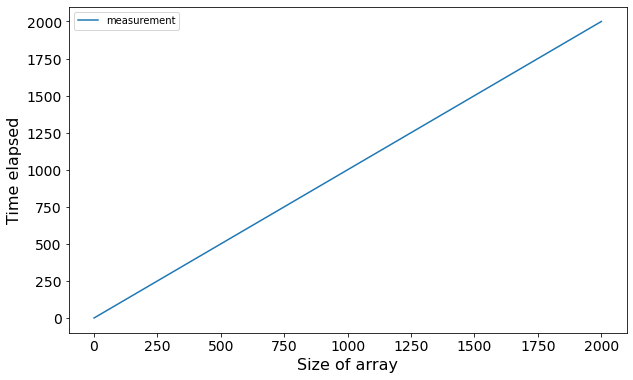

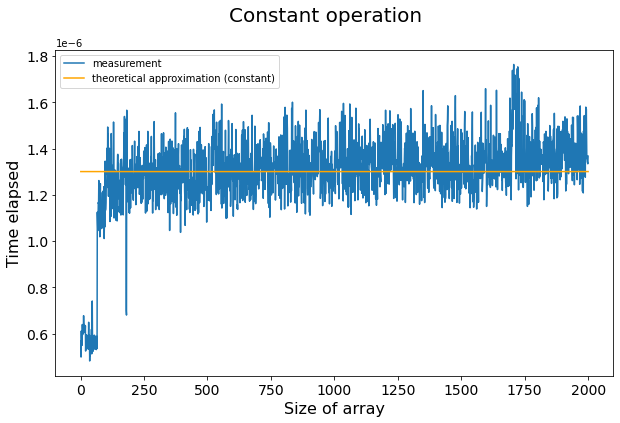

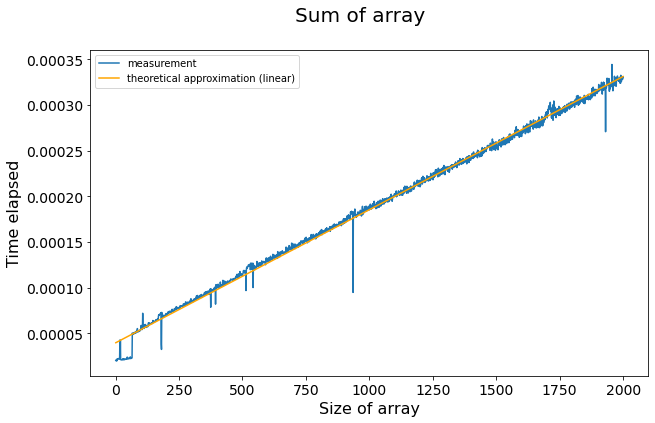

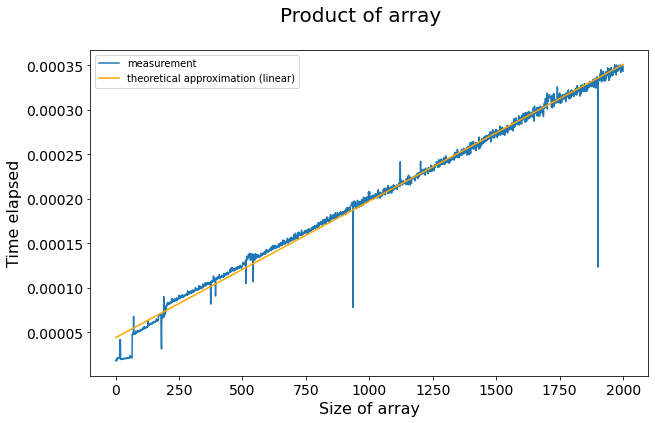

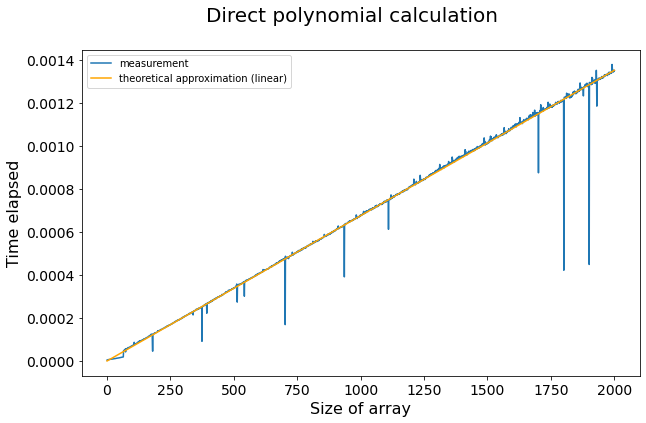

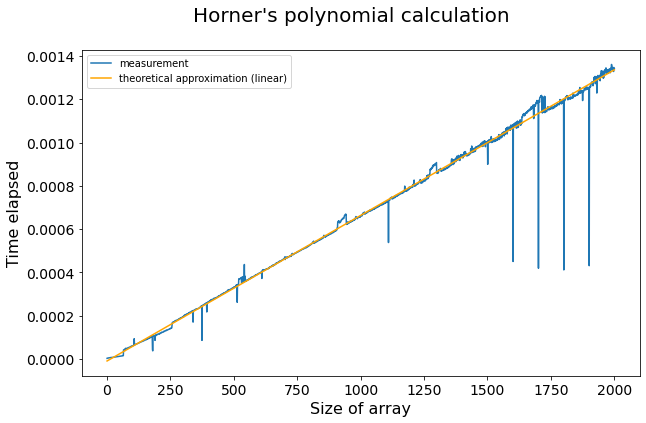

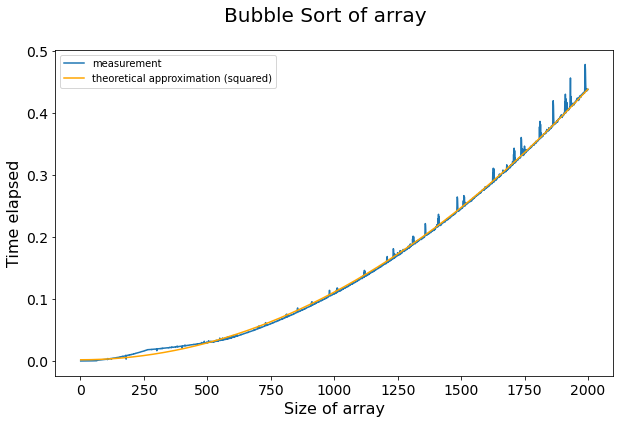

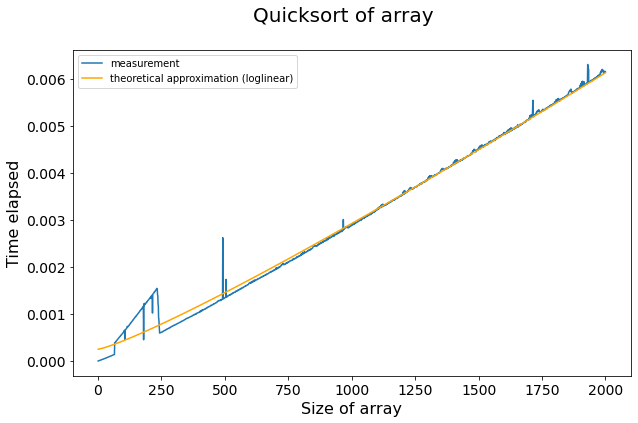

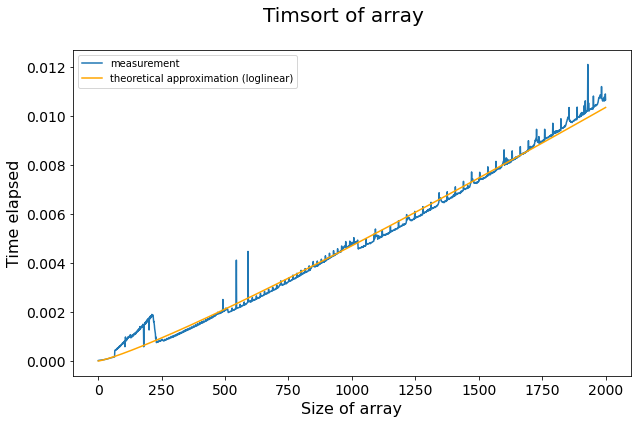

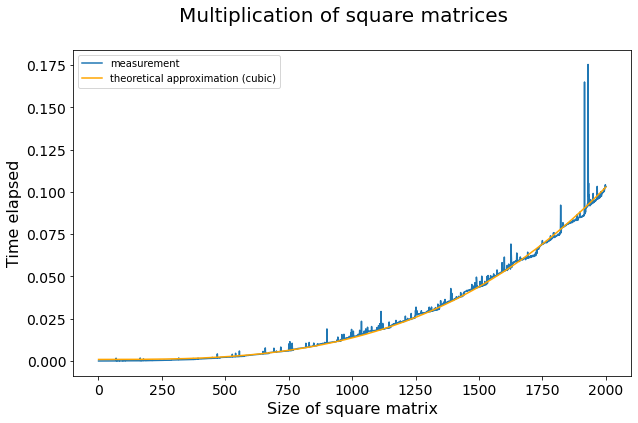

In [3]:
COLNAMES = {
    "n": None,
    "const_": "Constant operation",
    "sum_": "Sum of array",
    "prod_": "Product of array",
    "direct_poly": "Direct polynomial calculation",
    "horners_poly": "Horner's polynomial calculation",
    "bubblesort.sort": "Bubble Sort of array",
    "quicksort.sort": "Quicksort of array",
    "timsort.sort": "Timsort of array",
    "matrix_mult": "Multiplication of square matrices"
}

for colname in df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df['n'], df[colname], label='measurement')
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Time elapsed', fontsize=16)
    
    if colname == 'matrix_mult':
        plt.xlabel('Size of square matrix', fontsize=16)
        coeffs = np.polyfit(x=df['n'] ** 3, y=df[colname], deg=1)
        theor = coeffs[0] * df['n'] ** 3 + coeffs[1]
        label = 'cubic'
    else:
        plt.xlabel('Size of array', fontsize=16)
    
    if colname == 'const_':
        coeffs = np.polyfit(x=df['n'], y=df[colname], deg=0)
        theor = np.full_like(df['n'], coeffs[0], dtype=np.float64)
        label = 'constant'
    elif colname in ['sum_', 'prod_', 'direct_poly', 'horners_poly']:
        coeffs = np.polyfit(x=df['n'], y=df[colname], deg=1)
        theor = coeffs[0] * df['n'] + coeffs[1]
        label = 'linear'
    elif colname in ['quicksort.sort', 'timsort.sort']:
        coeffs = np.polyfit(x=np.log(df['n']) * df['n'], y=df[colname], deg=1)
        theor = coeffs[0] * np.log(df['n']) * df['n'] + coeffs[1]
        label = 'loglinear'
    elif colname == 'bubblesort.sort':
        coeffs = np.polyfit(x=df['n'] ** 2, y=df[colname], deg=1)
        theor = coeffs[0] * df['n'] ** 2 + coeffs[1]
        label = 'squared'
    
    if colname != 'n':
        plt.plot(df['n'], theor, label=f'theoretical approximation ({label})', c='orange')
    
    plt.suptitle(COLNAMES[colname], fontsize=20)
    plt.legend()
    plt.show()